Original dataset head:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        2               1        1              2   
1      M   71        2               2        1              1   
2      M   61        2               1        1              2   
3      M   55        2               2        1              2   
4      F   56        2               1        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         1                  2         2   
1                2         1         2         2                  1         1   
2                2         1         2         2                  1         1   
3                1         1         1         2                  2         1   
4                1         2         2         2                  2         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                   

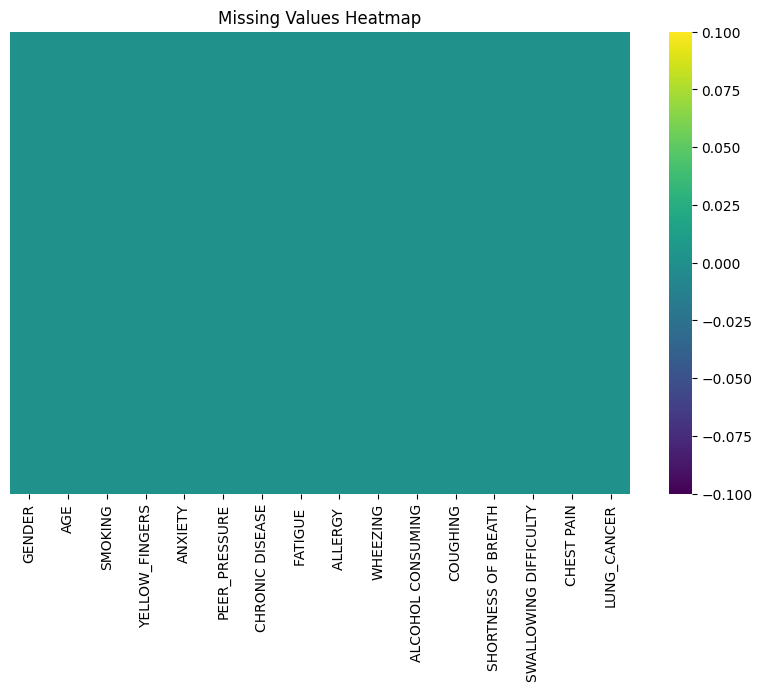

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Missing value handling function
def handle_missing(df):
    # Check for missing values
    missing_data = df.isna().sum()
    print("Missing values per column:\n", missing_data)
    if missing_data.sum() == 0:
        print("No missing values detected. No imputation needed.")
    else:
        # Impute missing values with median if any exist
        original_shape = df.shape
        df = df.fillna(df.median(numeric_only=True))
        missing_columns = df.columns[df.isna().any()].tolist()
        if missing_columns:
            print("Warning: Some columns still have NA values:", missing_columns)
        else:
            print("All missing values handled successfully.")
        print(f"Original shape: {original_shape}, New shape: {df.shape}")
    return df


# Load the raw dataset 
df = pd.read_csv('../data/raw/lcs_synthetic_20000.csv')
print("Original dataset head:\n", df.head())
df = handle_missing(df)

#Visualize missing values
# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.savefig('../results/eda_visualizations/missing_values_heatmap.png')


# Save the processed dataset for the next step
df.to_csv('../results/outputs/missing_handled.csv', index=False)
print("Saved to 'results/outputs/missing_handled.csv'")